<a href="https://colab.research.google.com/github/sssouto/caminho-da-escola/blob/main/Teste.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [80]:

# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import files
uploaded = files.upload()

Saving PIB dos Municípios - base de dados 2012-2018.xls to PIB dos Municípios - base de dados 2012-2018.xls


In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
pd.options.display.float_format = '{:.2f}'.format
# pd.options.display.float_format = '{:,}'.format


<Figure size 2016x720 with 0 Axes>

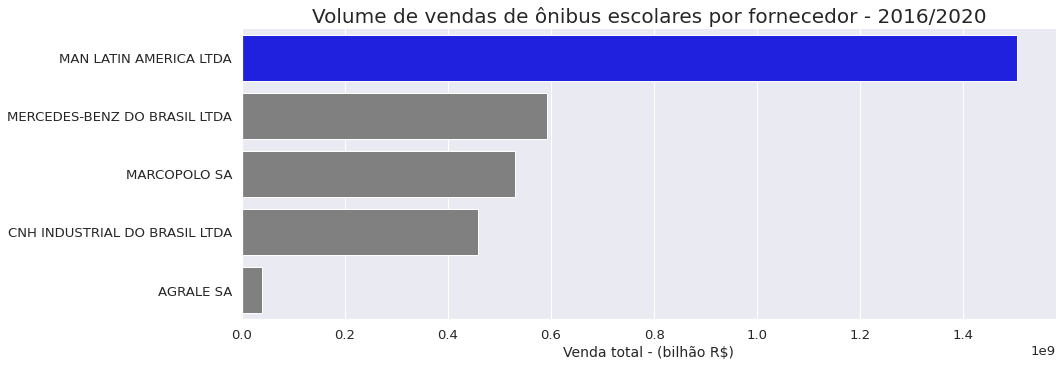

In [79]:
# import xlrd
df_sigarp = pd.read_excel(io.BytesIO(uploaded['sigarp_fnde_pregoes_onibus_+2015.xlsx']))
# path2 = 'https://github.com/sssouto/caminho-da-escola/blob/main/sigarp_fnde_pregoes_onibus.xls'
# path2 = '/content/drive/MyDrive/Programação/data/sigarp_fnde_pregoes_onibus_+2015.xlsx'
# # df_sigarp = xlrd.open_workbook(path2, encoding_override="utf-8")
# df_sigarp = pd.read_excel(path2)
# ,dtype={'Valor unitário': float,'Valor total': float}
# ,dtype={'Valor unitário': np.float64,'Valor total': np.float64}
df_sigarp['ano_compra'] = pd.DatetimeIndex(df_sigarp['Data última mov.']).year
df_sigarp = df_sigarp[df_sigarp['ano_compra'] < 2021]
df_sigarp

# grouped = df_sigarp.groupby([df_sigarp['Fornecedor']])
# df_sigarp_fornecedor_valor = grouped.agg({'Valor total':'sum'})
df_sigarp['Fornecedor'] = df_sigarp['Fornecedor'].replace({'MAN LATIN AMERICA INDUSTRIA E COMERCIO DE VEICULOS LTDA': 'MAN LATIN AMERICA LTDA', 'SAN MARINO ONIBUS LTDA': 'MARCOPOLO SA'})
# df_sigarp['Fornecedor'].unique()

df_sigarp_fornecedor_valor = df_sigarp['Valor total'].groupby([df_sigarp['Fornecedor']]).sum().reset_index(level='Fornecedor')
df_sigarp_fornecedor_valor = df_sigarp_fornecedor_valor.sort_values('Valor total', ascending=False)
df_sigarp_fornecedor_valor
# selecao = df_sigarp_fornecedor_valor.reset_index(level='Fornecedor')
# selecao

plt.figure(figsize=(28,10))
sns.set(font_scale=1.2)
clrs = ['blue' if (x > 1000000000) else 'grey' for x in df_sigarp_fornecedor_valor['Valor total']]
g = sns.catplot(kind='bar', x="Valor total", y="Fornecedor", data=df_sigarp_fornecedor_valor, palette=clrs, orient='h', aspect=3)
g.set_axis_labels("Venda total - (bilhão R$)", "", fontsize=14)
# plt.ylim(0, 1600000000)
# g.set_xlabel(' ')
# g.set_ylabel('Venda total - R$ bilhão',fontsize=20)
# g.tick_params(labelsize=15)
# # g.set(xlabel=' ', ylabel='Venda total - R$ bilhão')
plt.title('Volume de vendas de ônibus escolares por fornecedor - 2016/2020',fontsize=20)
# plt.figtext(0.5, 0.01, "* Ônibus escolares adquiridos por meio do Programa Caminho da Escola, do Governo Federal. Fonte: SIGARP/FNDE/MEC", ha="center", fontsize=12)
# for index, row in df_sigarp_fornecedor_valor.iterrows():
#     g.text(row.name,row['Valor total'], row['Valor total'], color='black', ha="center", fontsize=20)

plt.show()
# g.set_xticklabels(g.get_xticklabels(), rotation=90)

# df_sigarp['ano_compra'].unique()
# df_sigarp.info()

Text(0.35, 0.001, '* Foram consideradas neste levantamento somente as compras em que foi adquirido apenas 1 veículo')

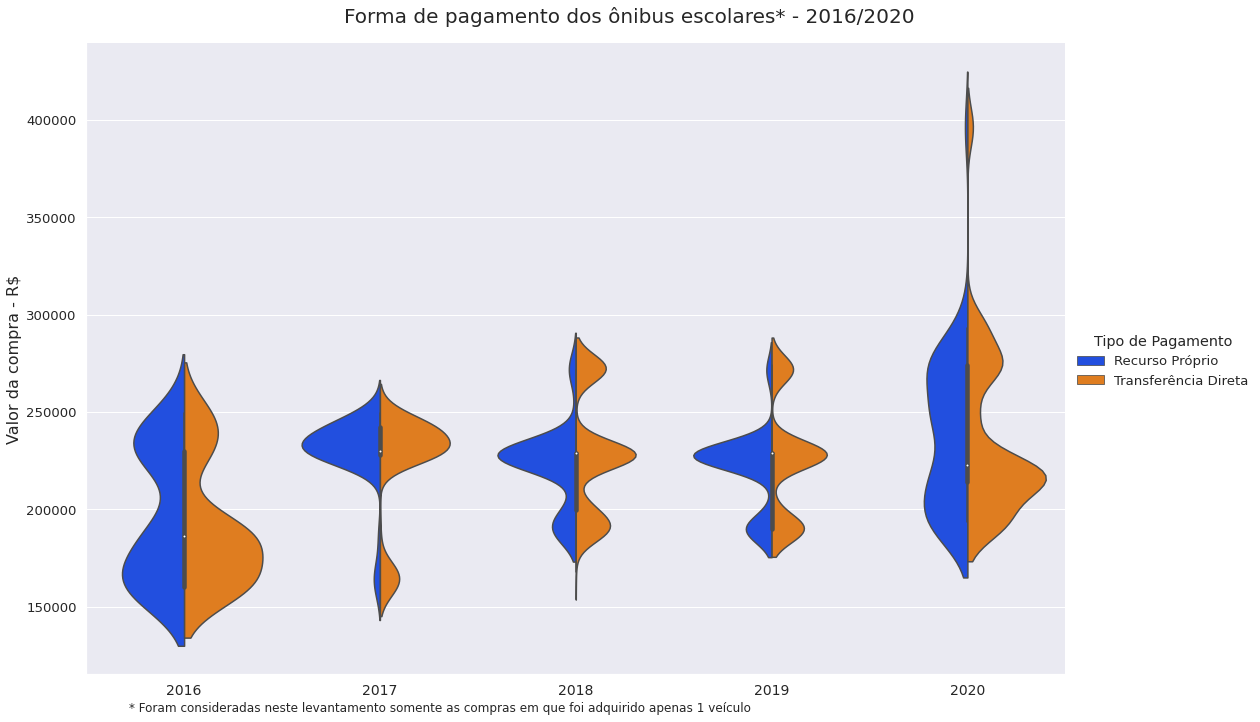

In [76]:
df_sigarp
# df_sigarp['Tipo de Pagamento'].unique()
# df_sigarp_ano_valor = df_sigarp['Valor total'].groupby([df_sigarp['ano_compra'],df_sigarp['Tipo de Pagamento']]).sum().reset_index()
# df_sigarp_ano_valor
df_sigarp_ano_valor = df_sigarp[df_sigarp['Qtde.'] == 1]
g = sns.catplot(x="ano_compra", y="Valor total", hue="Tipo de Pagamento", kind="violin", split=True, data=df_sigarp_ano_valor, palette='bright', height=10, aspect=1.5)
g.set_axis_labels("", "Valor da compra - R$", fontsize=16)
g.set_xticklabels(fontsize=14)
g.fig.subplots_adjust(top=0.93)
g.fig.suptitle("Forma de pagamento dos ônibus escolares* - 2016/2020", fontsize=20)
plt.figtext(0.35, 0.001, "* Foram consideradas neste levantamento somente as compras em que foi adquirido apenas 1 veículo", ha="center", fontsize=12)

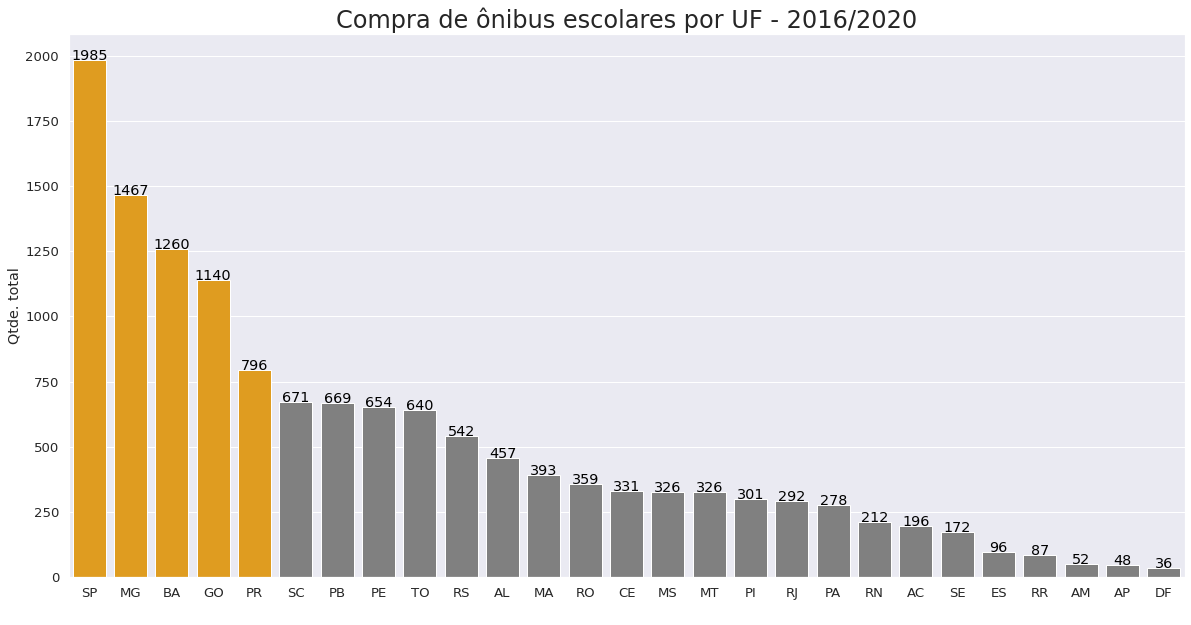

In [77]:
import heapq

df_sigarp
df_sigarp_uf_qtde = df_sigarp['Qtde.'].groupby([df_sigarp['UF']]).sum().reset_index(level='UF')
df_sigarp_uf_qtde = df_sigarp_uf_qtde.sort_values('Qtde.', ascending=False).reset_index()
df_sigarp_uf_qtde
# df_sigarp_uf_qtde[:5]
# f5 = heapq.nlargest(5, df_sigarp_uf_qtde['Qtde.'])
# type(f5[0])
# df_sigarp_uf_qtde.isin(f5)

plt.figure(figsize=(20,10))
sns.set(font_scale=1.2)
# clrs = []
# for x in df_sigarp_uf_qtde['Qtde.']:
#   if x in(heapq.nlargest(5, df_sigarp_uf_qtde['Qtde.'])):
#     print(x)
#   else:
#     print('xxxxxxx')
clrs = ['orange' if x in(heapq.nlargest(5, df_sigarp_uf_qtde['Qtde.'])) else 'grey' for x in df_sigarp_uf_qtde['Qtde.']]
g = sns.barplot(x="UF", y="Qtde.", data=df_sigarp_uf_qtde, palette=clrs)
g.set(xlabel=' ', ylabel='Qtde. total')
plt.title('Compra de ônibus escolares por UF - 2016/2020',fontsize=24)
# plt.figtext(0.5, 0.05, "* Ônibus escolares adquiridos por meio do Programa Caminho da Escola, do Governo Federal. Fonte: SIGARP/FNDE/MEC", ha="center", fontsize=12)

for index, row in df_sigarp_uf_qtde.iterrows():
    g.text(row.name,row['Qtde.'], round(row['Qtde.'],2), color='black', ha="center")

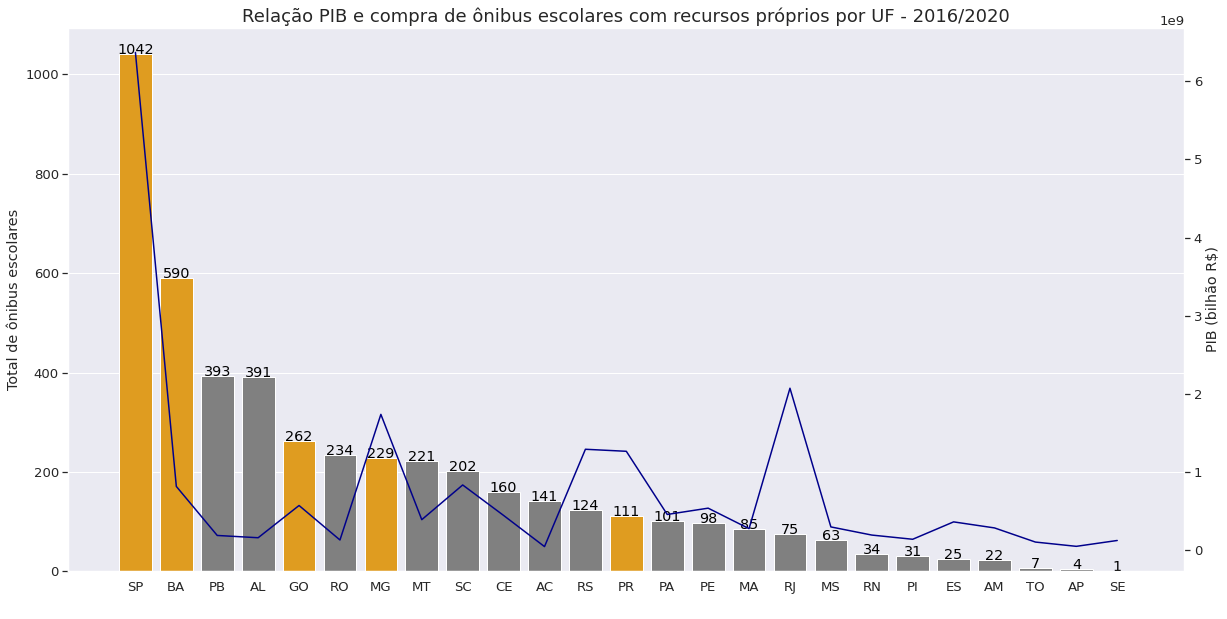

In [81]:
import heapq

df_sigarp_rec_prop = df_sigarp[df_sigarp['Tipo de Pagamento'] == 'Recurso Próprio']
# df_sigarp_rec_prop['Tipo de Pagamento'].unique()
df_sigarp_rec_prop_uf_qtde = df_sigarp_rec_prop['Qtde.'].groupby([df_sigarp_rec_prop['UF']]).sum().reset_index(level='UF')
df_sigarp_rec_prop_uf_qtde = df_sigarp_rec_prop_uf_qtde.sort_values('Qtde.', ascending=False).reset_index()
df_sigarp_rec_prop_uf_qtde

# path3 = '/content/drive/MyDrive/Programação/data/PIB dos Municípios - base de dados 2010-2018.xls'
# df_pib = pd.read_excel(path3)
df_pib = pd.read_excel(io.BytesIO(uploaded['PIB dos Municípios - base de dados 2012-2018.xls']))
data = [df_pib["Sigla da Unidade da Federação"], df_pib["Ano"], df_pib["Produto Interno Bruto, \na preços correntes\n(R$ 1.000)"]]
headers = ["UF", "Ano", "PIB"]
df_pib_short = pd.concat(data, axis=1, keys=headers)
df_pib_short = df_pib_short[df_pib_short['Ano'] >= 2016]
# df_pib_short
df_pib_uf = df_pib_short['PIB'].groupby(df_pib_short['UF']).sum().reset_index(level='UF')
# df_pib_uf = df_pib_short['PIB'].groupby(df_pib_short['UF']).mean().reset_index(level='UF')
df_pib_uf
# df_pib_uf = df_pib_uf[df_pib_uf['Ano'] > 2013]
# df_pib_uf = df_pib_short['PIB'].groupby([df_pib_short['UF'], df_pib_short['Ano']]).sum().reset_index(level='Ano')

df_sigarp_rec_prop_uf_qtde_pib = df_sigarp_rec_prop_uf_qtde.merge(df_pib_uf, on='UF')
# df_sigarp_rec_prop_uf_qtde_pib = df_sigarp_rec_prop_uf_qtde_pib.sort_values('PIB', ascending=False)
df_sigarp_rec_prop_uf_qtde_pib
# df_sigarp_rec_prop_uf_qtde_pib = df_sigarp_rec_prop_uf_qtde_pib.tail(10)

fig, ax1 = plt.subplots(figsize=(20,10))
# clrs = ['orange' if x in(heapq.nlargest(5, df_sigarp_uf_qtde['Qtde.'])) else 'grey' for x in df_sigarp_uf_qtde['Qtde.']]
clrs = ['orange' if x in ['SP', 'MG', 'BA', 'GO', 'PR'] else 'grey' for x in df_sigarp_rec_prop_uf_qtde_pib['UF']]
g = sns.barplot(data = df_sigarp_rec_prop_uf_qtde_pib, x='UF', y='Qtde.', ax=ax1, palette=clrs)
ax2 = ax1.twinx()
ax2.grid(False)
ax1.set(xlabel=' ', ylabel='Total de ônibus escolares')
ax2.set(ylabel='PIB (bilhão R$)')
plt.title('Relação PIB e compra de ônibus escolares com recursos próprios por UF - 2016/2020', fontsize=18)
# plt.set(xlabel=' ', ylabel='Qtde. total')
sns.lineplot(data = df_sigarp_rec_prop_uf_qtde_pib['PIB'], ax=ax2, color='darkblue')

for index, row in df_sigarp_rec_prop_uf_qtde_pib.iterrows():
    g.text(row.name,row['Qtde.'], round(row['Qtde.'],2), color='black', ha="center")

# plt.figure(figsize=(12,8))
# sns.set(font_scale=1.2)
# clrs = ['blue' if x in(heapq.nlargest(5, df_sigarp_uf_qtde['Qtde.'])) else 'grey' for x in df_sigarp_uf_qtde['Qtde.']]
# g = sns.barplot(x="UF", y="Qtde.", data=df_sigarp_uf_qtde, palette=clrs)
# g.set(xlabel=' ', ylabel='Qtde. total')
# plt.title('Compra de ônibus escolares por UF - 2016/2020',fontsize=24)


In [45]:
df_pib_uf.sort_values(by='PIB', ascending=False).reset_index(drop=True)

,UF,PIB
0,SP,6370080966.22
1,RJ,2070865921.37
2,MG,1736061832.89
3,RS,1289353532.93
4,PR,1263341437.50
5,SC,832251995.14
6,BA,813702601.60
7,DF,735079498.84
8,GO,569389628.56
9,PE,535306507.33


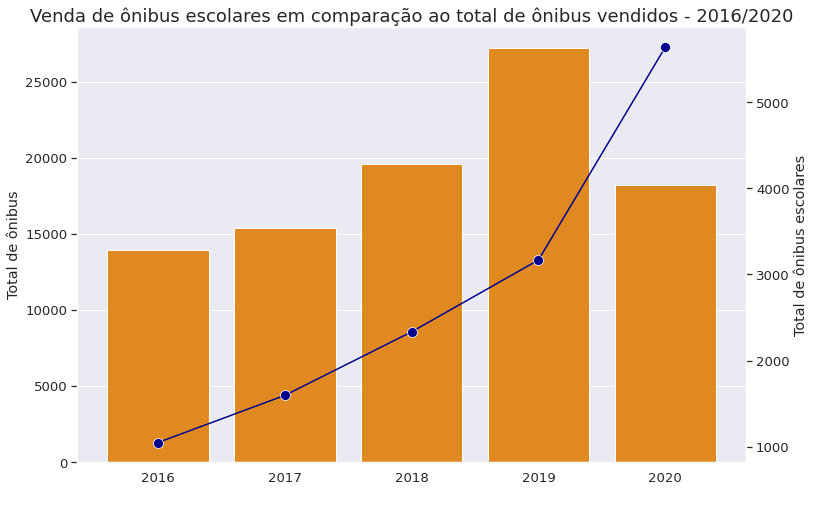

In [65]:
df_sigarp_fornecedor_valor = df_sigarp['Qtde.'].groupby(df_sigarp['ano_compra']).sum().reset_index(level='ano_compra')
df_sigarp_fornecedor_valor.rename(columns={"Qtde.": "Total de ônibus escolares"},inplace=True)
# df_sigarp_fornecedor_valor['Total de ônibus'] = pd.Series({2016: 13924, 2017: 15357, 2018: 19572, 2019: 27193, 2020: 18219})
df_sigarp_fornecedor_valor['Total de ônibus'] = pd.Series([13924, 15357, 19572, 27193, 18219])
df_sigarp_fornecedor_valor['Participacao escolar'] = df_sigarp_fornecedor_valor['Total de ônibus escolares'] / df_sigarp_fornecedor_valor['Total de ônibus'] * 100

#esta tabela abaixo pode ser útil para mostrar a participação do ônibus escolar no todo
df_sigarp_fornecedor_valor

fig, ax1 = plt.subplots(figsize=(12,8))
sns.barplot(data = df_sigarp_fornecedor_valor, x='ano_compra', y='Total de ônibus', ax=ax1, color="darkorange")
ax2 = ax1.twinx()
ax2.grid(False)
ax1.set(xlabel=' ')
plt.title('Venda de ônibus escolares em comparação ao total de ônibus vendidos - 2016/2020',fontsize=18)
# plt.set(xlabel=' ', ylabel='Qtde. total')
sns.lineplot(data = df_sigarp_fornecedor_valor['Total de ônibus escolares'], ax=ax2, color='darkblue', marker='o', markersize=10)

In [ ]:
path = "/content/drive/MyDrive/Programação/data/netflix_titles.csv"
df_netflix = pd.read_csv(path)

In [ ]:
# df_netflix.sort_values(by=['country','release_year'],axis=0)
df_netflix['date_added'] = pd.to_datetime(df_netflix['date_added'])
# df_netflix
df_netflix.loc[df_netflix['type'] == 'TV Show',['type','title','country','release_year']]
# pd.DataFrame.info(df_netflix)

,type,title,country,release_year
0,TV Show,3%,Brazil,2020
5,TV Show,46,Turkey,2016
11,TV Show,1983,"Poland, United States",2018
12,TV Show,1994,Mexico,2019
16,TV Show,Feb-09,NaN,2018
...,...,...,...,...
7767,TV Show,Zindagi Gulzar Hai,Pakistan,2012
7775,TV Show,Zoids Wild,Japan,2018
7777,TV Show,Zombie Dumb,NaN,2018
7779,TV Show,Zona Rosa,Mexico,2019
